## Library Imports and initialization

In [ ]:
!pip install tsai
!pip install -q fastai2
!pip install optuna
!pip install optuna-integration
!pip install ipython==8.20.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.2/809.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 7

In [ ]:
import numpy as np
import pandas as pd
import pickle

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from tsai.basics import *
from tsai.data.all import *
from tsai.models.utils import *
from tsai.models.InceptionTimePlus import *
from tsai.models.TabModel import *

from fastai.tabular.all import *
from tsai.data.tabular import *
from tsai.models.MultiInputNet import *
from tsai.data.mixed import *

In [ ]:
from drive.MyDrive import MultiInput

In [ ]:
%cd /content/drive/MyDrive/MultiInput

/content/drive/MyDrive/MultiInput


In [ ]:
from drive.MyDrive.MultiInput.ts_signal import *
from drive.MyDrive.MultiInput.tab_model_new import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(447, 13)
len(patient_ids) = 366 (# of patients, or N)
366 = (# of patients before filtering)
len(filenames) = 969 (# of signals before filtering)
len(used_filenames) = 969/969 = 100% (# of signals)
count_insufficient_whistle_time = 0/969 = 0% (whistle length not between 8 and 20 seconds)
count_insufficient_signal_length = 0/969 = 0% (signal length not at least 35 seconds)
count_invalid_predictor = 0 = 0% (no Strain value available)
count_use4train_false = 0/969 = 0% (signals the operator marked as data which should not be used for training the AI, such as patients with pacemakers or who failed to properly perform the valsalva maneuver)
count_exceptions = 0/969 = 0% (for situations such as missing data)
count_test = 161/969 = 17% (for testing data)
Multiple Whistles=145
X.shape = (969, 3, 3000)
y.shape = (969,)
np.histogram(y, bins=2) = (array([267, 702]), ar

## Get Dataloaders

In [ ]:
tab_model_dls_list = get_dls_fold_list()

638
170
639
169
653
155
648
160
654
154


In [ ]:
tab_model_dls_list

In [ ]:
sig_model_dls_list, sig_model_list, sig_test_dls = train()

Data loaded.
len(patient_ids) = 365 (# of patients, or N)
366 = (# of patients before filtering)
len(filenames) = 969 (# of signals before filtering)
len(used_filenames) = 966/969 = 100% (# of signals)
count_insufficient_whistle_time = 0/969 = 0% (whistle length not between 8 and 20 seconds)
count_insufficient_signal_length = 0/969 = 0% (signal length not at least 35 seconds)
count_invalid_predictor = 0 = 0% (no Strain value available)
count_use4train_false = 3/969 = 0% (signals the operator marked as data which should not be used for training the AI, such as patients with pacemakers or who failed to properly perform the valsalva maneuver)
count_exceptions = 0/969 = 0% (for situations such as missing data)
count_test = 161/969 = 17% (for testing data)
Multiple Whistles=145
X.shape = (966, 3, 3000)
y.shape = (966,)
np.histogram(y, bins=2) = (array([267, 699]), array([ 4., 14., 24.]))
635
170
639
166
650
155
645
160
651
154
['fc_dropout', 'ks', 'conv_dropout', 'sa', 'se', 'nb_filters', '

In [ ]:
sig_model_dls_list

In [ ]:
tab_dls = tab_model_dls_list[1]
ts_dls = sig_model_dls_list[1]

In [ ]:
# sig_model = build_ts_model(InceptionTimePlus, dls=ts_dls)

In [ ]:
ts_dls.one_batch()

(TSTensor(samples:32, vars:3, len:3000, device=cuda:0, dtype=torch.float32),
 tensor([16., 20., 21., 18., 20., 17., 18., 18., 16., 16., 22.,  9., 17., 20.,
         14., 17., 17.,  9.,  8., 19., 11., 19.,  9., 15., 16., 11., 19., 14.,
         14., 10., 15., 13.], device='cuda:0'))

In [ ]:
tab_dls.one_batch()

(tensor([[1, 1, 1, 1, 1, 1, 1, 1],
         [1, 2, 2, 1, 2, 2, 2, 2],
         [1, 1, 1, 1, 1, 1, 2, 2],
         [1, 1, 1, 1, 1, 1, 2, 2],
         [1, 2, 1, 1, 1, 1, 1, 1],
         [1, 2, 1, 1, 1, 1, 1, 1],
         [1, 2, 1, 1, 1, 1, 1, 1],
         [1, 2, 1, 1, 1, 1, 2, 2],
         [2, 1, 2, 1, 1, 2, 1, 1],
         [2, 2, 1, 1, 1, 1, 2, 2],
         [2, 2, 1, 1, 1, 1, 2, 2],
         [1, 2, 1, 1, 1, 2, 2, 1],
         [1, 1, 1, 1, 1, 1, 2, 2],
         [1, 2, 1, 1, 1, 2, 2, 2],
         [1, 1, 2, 1, 2, 1, 1, 1],
         [1, 2, 2, 1, 1, 2, 2, 2],
         [2, 2, 2, 1, 1, 1, 2, 2],
         [2, 2, 1, 1, 1, 1, 1, 1],
         [1, 2, 1, 1, 1, 1, 2, 2],
         [1, 1, 1, 1, 1, 1, 2, 2],
         [1, 1, 1, 1, 1, 1, 1, 1],
         [1, 2, 1, 1, 1, 2, 2, 2],
         [1, 1, 1, 1, 1, 1, 1, 1],
         [1, 2, 1, 1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1, 2, 1, 1],
         [1, 1, 2, 1, 1, 1, 1, 1],
         [2, 2, 2, 2, 2, 1, 2, 2],
         [1, 1, 1, 1, 1, 1, 1, 1],
         [1, 1, 2, 1

In [ ]:
ts_dls.train.shuffle = False

In [ ]:
tab_dls.train.shuffle = False

In [ ]:
mixed_dls = get_mixed_dls(ts_dls, tab_dls, shuffle_train=None, shuffle_valid=None)

In [ ]:
mixed_dls.one_batch()

((TSTensor(samples:32, vars:3, len:3000, device=cuda:0, dtype=torch.float32),
  (tensor([[2, 2, 2, 1, 1, 2, 2, 2],
           [2, 2, 2, 1, 1, 2, 2, 2],
           [2, 2, 2, 1, 1, 2, 2, 2],
           [1, 2, 1, 1, 1, 1, 2, 2],
           [1, 2, 1, 1, 1, 2, 2, 2],
           [1, 2, 1, 1, 1, 2, 2, 2],
           [1, 2, 1, 1, 1, 2, 2, 2],
           [1, 1, 2, 1, 1, 1, 1, 1],
           [1, 1, 2, 1, 1, 1, 1, 1],
           [1, 1, 2, 1, 1, 1, 1, 1],
           [1, 2, 1, 1, 1, 1, 1, 1],
           [1, 2, 1, 1, 1, 1, 1, 1],
           [1, 2, 1, 1, 1, 1, 1, 1],
           [1, 1, 1, 1, 1, 1, 1, 1],
           [2, 1, 2, 1, 1, 2, 1, 1],
           [1, 1, 1, 1, 1, 1, 1, 1],
           [1, 1, 1, 1, 1, 1, 1, 1],
           [1, 1, 1, 1, 1, 1, 1, 1],
           [1, 2, 2, 1, 1, 2, 2, 2],
           [1, 2, 2, 1, 1, 2, 2, 2],
           [1, 2, 2, 1, 1, 2, 2, 2],
           [1, 2, 1, 1, 1, 1, 1, 1],
           [1, 2, 1, 1, 1, 1, 1, 1],
           [1, 2, 1, 1, 1, 1, 1, 1],
           [1, 1, 1, 1, 1, 1, 1, 1

### Get Test dls

In [ ]:
tab_test_dls = get_test_dls()

## Modelling

In [ ]:
test_mixed_dls = get_mixed_dls(sig_test_dls, tab_test_dls, shuffle_train=None, shuffle_valid=None)

In [ ]:
test_mixed_dls.one_batch()

((TSTensor(samples:32, vars:3, len:3000, device=cuda:0, dtype=torch.float32),
  (tensor([[1, 2, 1, 1, 1, 1, 2, 2],
           [1, 2, 1, 1, 1, 2, 1, 1],
           [1, 1, 1, 1, 1, 2, 2, 2],
           [1, 2, 1, 1, 2, 2, 2, 2],
           [1, 2, 2, 1, 1, 2, 2, 2],
           [1, 1, 1, 1, 1, 1, 2, 2],
           [2, 2, 1, 1, 1, 2, 1, 1],
           [2, 2, 2, 1, 1, 2, 2, 2],
           [2, 2, 2, 1, 1, 2, 2, 2],
           [1, 2, 1, 1, 1, 1, 1, 1],
           [1, 2, 1, 1, 1, 1, 1, 1],
           [2, 2, 2, 1, 1, 2, 1, 1],
           [2, 2, 2, 1, 1, 2, 2, 2],
           [1, 2, 1, 1, 1, 1, 1, 1],
           [2, 2, 2, 1, 1, 1, 1, 2],
           [2, 2, 1, 1, 1, 1, 2, 2],
           [2, 2, 1, 1, 1, 1, 2, 2],
           [2, 2, 1, 1, 2, 1, 2, 2],
           [1, 2, 2, 1, 2, 2, 2, 2],
           [2, 2, 2, 1, 2, 1, 2, 2],
           [2, 2, 2, 1, 2, 1, 2, 2],
           [1, 2, 2, 1, 2, 1, 2, 2],
           [1, 1, 1, 1, 1, 2, 2, 2],
           [1, 1, 1, 1, 1, 1, 2, 1],
           [2, 1, 1, 1, 1, 1, 1, 1

In [ ]:
sig_model = sig_model_list[0]

In [ ]:
tab_model

TabModel(
  (backbone): TabBackbone(
    (embeds): ModuleList(
      (0-7): 8 x Embedding(3, 3)
    )
    (emb_drop): Dropout(p=0.0, inplace=False)
    (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (head): TabHead(
    (head): Sequential(
      (0): LinBnDrop(
        (0): BatchNorm1d(26, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Linear(in_features=26, out_features=200, bias=False)
        (2): ReLU(inplace=True)
      )
      (1): LinBnDrop(
        (0): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Linear(in_features=200, out_features=100, bias=False)
        (2): ReLU(inplace=True)
      )
      (2): LinBnDrop(
        (0): Linear(in_features=100, out_features=1, bias=True)
      )
    )
  )
)

In [ ]:
sig_model

InceptionTimePlus(
  (backbone): Sequential(
    (0): InceptionBlockPlus(
      (inception): ModuleList(
        (0): InceptionModulePlus(
          (convs): ModuleList(
            (0): ConvBlock(
              (0): SeparableConv1d(
                (depthwise_conv): Conv1d(3, 3, kernel_size=(29,), stride=(1,), padding=(14,), groups=3, bias=False)
                (pointwise_conv): Conv1d(3, 64, kernel_size=(1,), stride=(1,), bias=False)
              )
            )
            (1): ConvBlock(
              (0): SeparableConv1d(
                (depthwise_conv): Conv1d(3, 3, kernel_size=(15,), stride=(1,), padding=(14,), dilation=(2,), groups=3, bias=False)
                (pointwise_conv): Conv1d(3, 64, kernel_size=(1,), stride=(1,), bias=False)
              )
            )
            (2): ConvBlock(
              (0): SeparableConv1d(
                (depthwise_conv): Conv1d(3, 3, kernel_size=(7,), stride=(1,), padding=(12,), dilation=(4,), groups=3, bias=False)
                (po

In [ ]:
MultiModalNet = MultiInputNet(sig_model, tab_model)
MultiModalNet

MultiInputNet(
  (backbones): ModuleList(
    (0): Sequential(
      (0): InceptionBlockPlus(
        (inception): ModuleList(
          (0): InceptionModulePlus(
            (convs): ModuleList(
              (0): ConvBlock(
                (0): SeparableConv1d(
                  (depthwise_conv): Conv1d(3, 3, kernel_size=(29,), stride=(1,), padding=(14,), groups=3, bias=False)
                  (pointwise_conv): Conv1d(3, 64, kernel_size=(1,), stride=(1,), bias=False)
                )
              )
              (1): ConvBlock(
                (0): SeparableConv1d(
                  (depthwise_conv): Conv1d(3, 3, kernel_size=(15,), stride=(1,), padding=(14,), dilation=(2,), groups=3, bias=False)
                  (pointwise_conv): Conv1d(3, 64, kernel_size=(1,), stride=(1,), bias=False)
                )
              )
              (2): ConvBlock(
                (0): SeparableConv1d(
                  (depthwise_conv): Conv1d(3, 3, kernel_size=(7,), stride=(1,), padding=(12,), 

In [ ]:
tab_dls.c, ts_dls.c, ts_dls.cat

(1, 1, False)

In [ ]:
tab_model = build_tabular_model(TabModel, tab_dls)

In [ ]:
# Initialize variables to accumulate results
all_train_labels = []
all_train_predictions = []
all_test_labels = []
all_test_predictions = []
all_valid_labels = []
all_valid_predictions = []
model_fold_list = []

def train_multi_input(save_model_to):
  # Lists to store metrics values for each training run
  all_mae_list = []
  all_rmse_list = []
  all_loss = []


  for run_index in range(5):
    if run_index == 1:
      continue
    tab_dls = tab_model_dls_list[run_index]
    ts_dls = sig_model_dls_list[run_index]

    tab_dls.train.shuffle = False
    tab_dls.valid.shuffle = False
    ts_dls.train.shuffle = False
    ts_dls.valid.shuffle = False

    test_mixed_dls = get_mixed_dls(sig_test_dls, tab_test_dls, shuffle_train=None, shuffle_valid=None)

    mixed_dls = get_mixed_dls(ts_dls, tab_dls, shuffle_train=None, shuffle_valid=None)

    layers = [500, 500, 500, 500]
    tab_model = build_tabular_model(TabModel, tab_dls, layers=layers)
    sig_model = sig_model_list[run_index]
    MultiModalNet = MultiInputNet(sig_model, tab_model)

    learn = Learner(mixed_dls, MultiModalNet, metrics=[mae, rmse])
    auto_lr = learn.lr_find().valley

    # # Reset the parameters of the model for this fold
    # for layer in learn.parameters():
    #     if hasattr(layer, "reset_parameters"):
    #         layer.reset_parameters()

    learn.fit_one_cycle(50, auto_lr)
    learn.plot_metrics()
    # learn.show_probas()

    # save learner model
    model_fold_list.append(learn)
    model_name = f"{save_model_to}/MultiInput_model_{run_index}.pkl"
    learn.export(model_name)

    # Get preds and targets
    preds_train, targets_train = learn.get_preds(dl=mixed_dls.train, with_input=False)
    preds_valid, targets_valid = learn.get_preds(dl=mixed_dls.valid, with_input=False)
    preds_test, targets_test = learn.get_preds(dl=test_mixed_dls.valid, with_input=False)

    # Get the final metrics values after training on the validation set
    val_metrics = learn.validate(dl=mixed_dls.valid)
    print(val_metrics)
    final_loss = val_metrics[0]
    final_mae = val_metrics[1]  # mae
    final_rmse = val_metrics[2]

    all_mae_list.append(final_mae)
    all_rmse_list.append(final_rmse)
    all_loss.append(final_loss)

    # append to lists
    all_train_labels.append(targets_train)
    all_train_predictions.append(preds_train)
    all_valid_labels.append(targets_valid)
    all_valid_predictions.append(preds_valid)
    all_test_labels.append(targets_test)
    all_test_predictions.append(preds_test)


  # Calculate the average MAE and RMSE
  average_mae = sum(all_mae_list) / len(all_mae_list)
  average_rmse = sum(all_rmse_list) / len(all_rmse_list)
  average_loss = sum(all_loss)  / len(all_loss)

  print("Average Loss:", average_loss)
  print("Average MAE:", average_mae)
  print("Average RMSE:", average_rmse)


epoch,train_loss,valid_loss,mae,_rmse,time
0,222.971817,166.751465,12.527065,12.913228,00:07
1,132.910278,18.970642,3.741939,4.355530,00:07
2,81.422752,14.223871,3.129766,3.771455,00:07
3,51.583031,24.658516,4.215243,4.965734,00:07
4,36.085102,13.399913,2.887356,3.660589,00:06
5,26.917902,13.087031,2.895489,3.617600,00:06
6,21.094578,11.203181,2.648185,3.347115,00:06
7,17.608816,7.380588,1.988389,2.716724,00:06
8,15.283618,10.115946,2.477520,3.180557,00:06
9,13.766463,7.749722,2.048413,2.783832,00:07


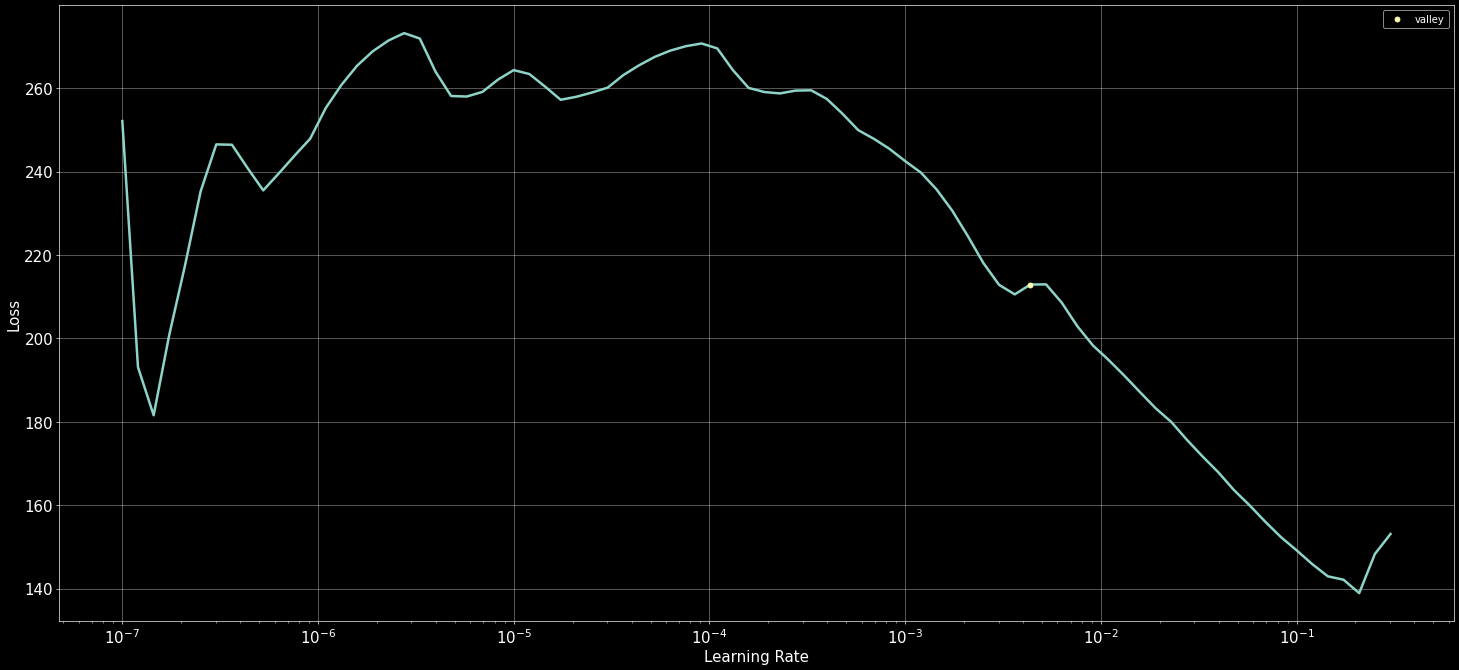

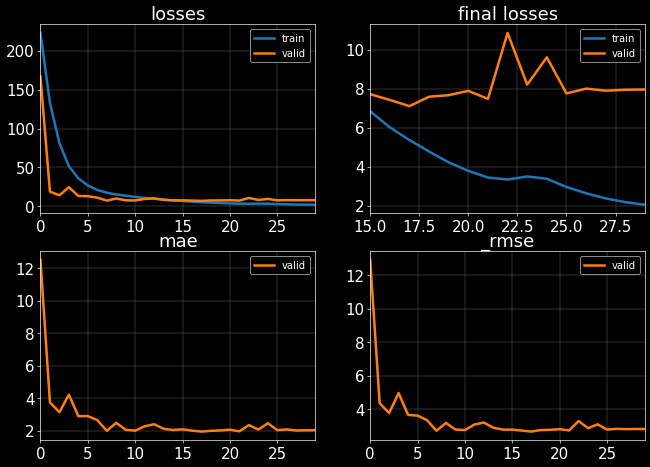

[7.964000701904297, 2.023641347885132, 2.8220560550689697]


epoch,train_loss,valid_loss,mae,_rmse,time
0,241.830765,188.980667,13.182805,13.747025,00:07
1,168.235367,23.726919,4.252277,4.871028,00:07
2,95.827141,15.727670,2.949174,3.965813,00:07
3,60.847466,45.896275,6.096906,6.774679,00:07
4,41.838623,14.809384,2.926507,3.848296,00:07
5,30.149153,12.408463,2.625951,3.522565,00:07
6,22.381964,9.057661,2.329695,3.009595,00:07
7,17.263601,9.799196,2.377175,3.130367,00:07
8,13.804259,10.620117,2.468168,3.258852,00:07
9,11.422091,11.392276,2.599638,3.375245,00:07


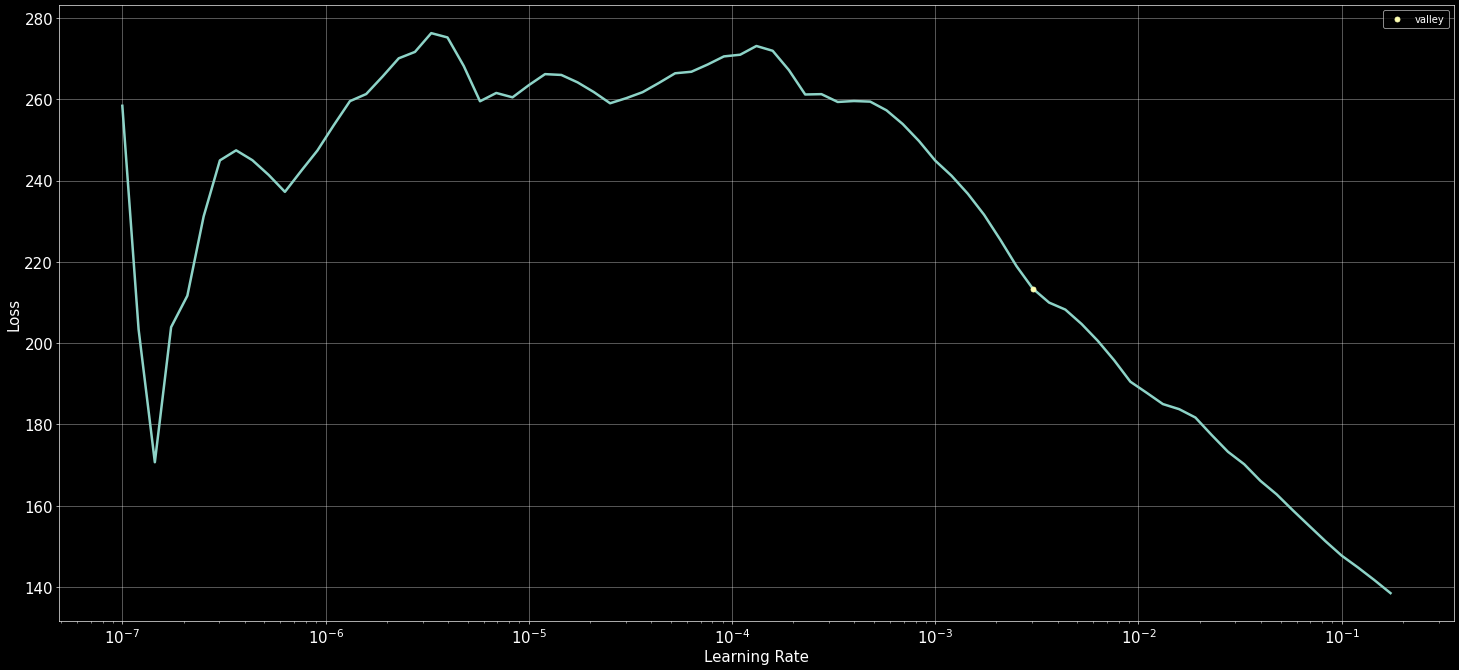

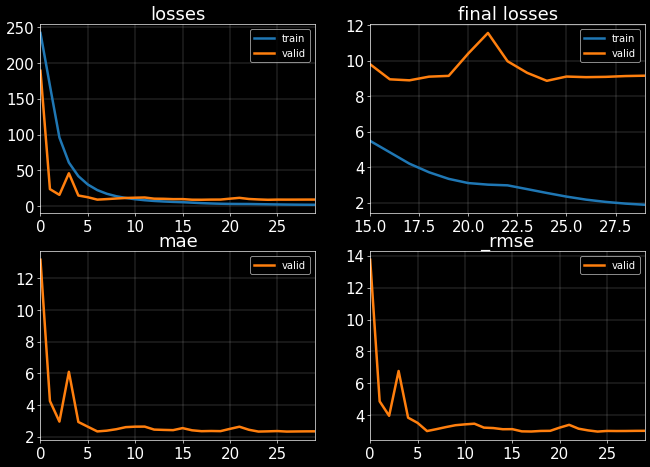

[9.149680137634277, 2.335047483444214, 3.02484393119812]


epoch,train_loss,valid_loss,mae,_rmse,time
0,201.984009,133.246353,11.073153,11.543239,00:07
1,107.004242,28.415836,4.705831,5.330651,00:07
2,71.059303,12.672403,3.056945,3.559832,00:07
3,45.170658,8.918383,2.278687,2.986366,00:07
4,32.507713,7.617505,2.114469,2.759983,00:07
5,25.477808,8.315037,2.375329,2.883580,00:07
6,20.663925,8.161504,2.275464,2.856835,00:07
7,18.000515,7.950366,2.354169,2.819639,00:07
8,16.109993,8.384241,2.400100,2.895555,00:07
9,14.843681,6.279320,1.961405,2.505857,00:07


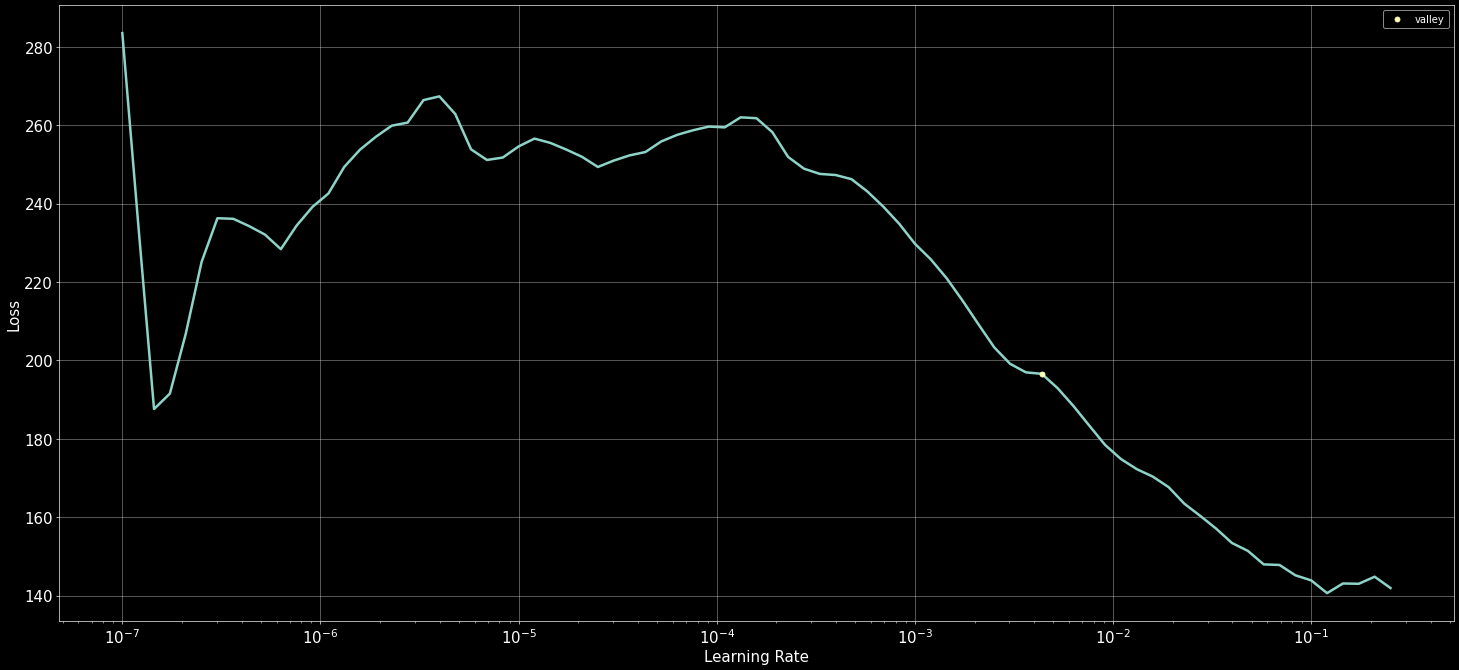

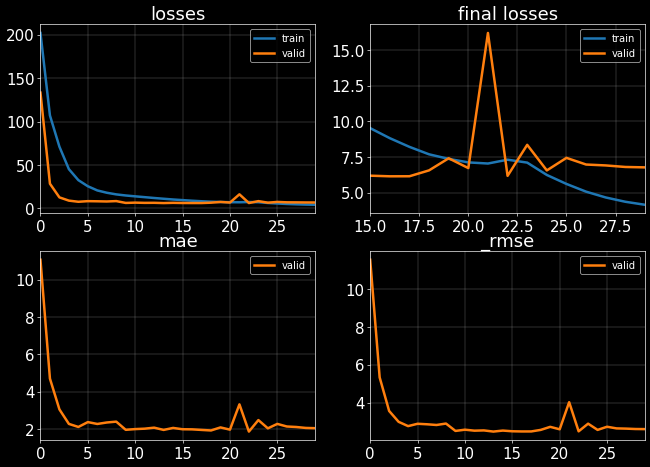

[6.768266201019287, 2.0486838817596436, 2.6015894412994385]


epoch,train_loss,valid_loss,mae,_rmse,time
0,218.676605,165.048920,12.378725,12.847137,00:07
1,128.241623,10.928912,2.704010,3.305891,00:07
2,78.138466,12.452587,2.906255,3.528822,00:07
3,49.981224,22.511244,3.909782,4.744602,00:07
4,36.056728,17.633545,3.391754,4.199232,00:07
5,28.136223,9.086066,2.413113,3.014310,00:07
6,22.434277,10.841977,2.621499,3.292716,00:07
7,18.557392,11.947813,2.876597,3.456561,00:07
8,16.055882,10.070013,2.480556,3.173329,00:07
9,14.235742,9.013829,2.335196,3.002304,00:07


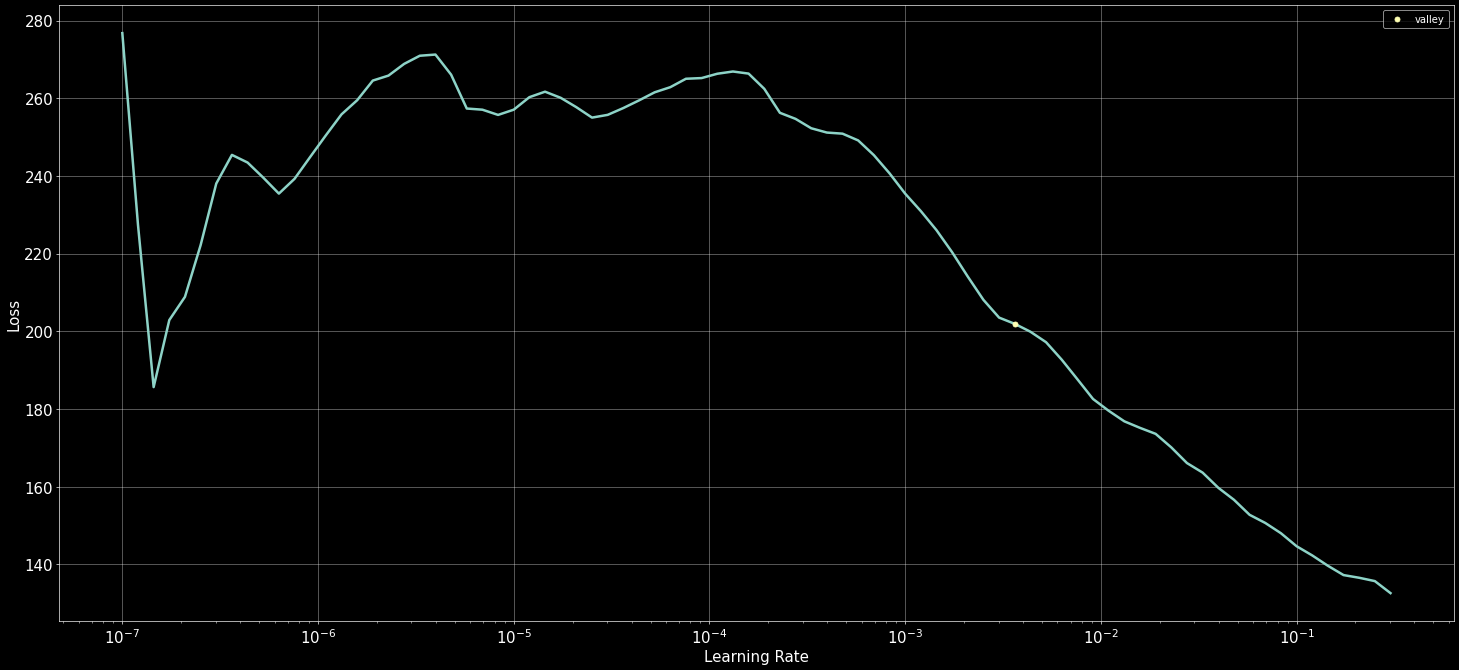

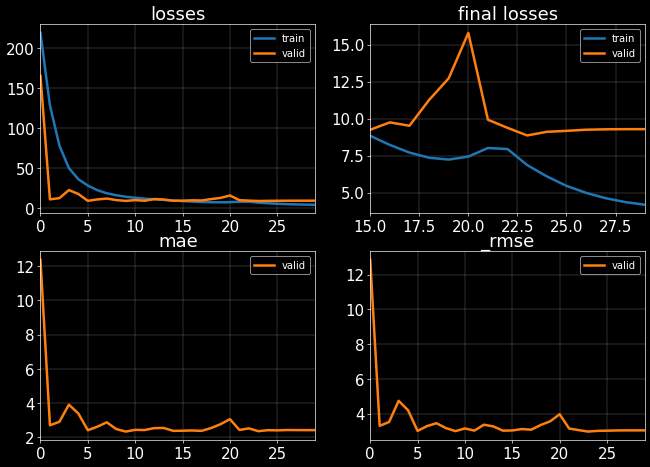

[9.283605575561523, 2.4193227291107178, 3.046901226043701]
Average Loss: 8.291388154029846
Average MAE: 2.2066738605499268
Average RMSE: 2.8738476634025574


In [ ]:
folder_path = "/content/drive/MyDrive/MultiInput/models/Test_02"
os.makedirs(folder_path, exist_ok=True)
train_multi_input(folder_path)

In [ ]:
# preds, targets = learn.get_preds(dl=mixed_dls.train, with_input=False)

## Plots and Insights

In [ ]:
## Make plots for each fold

for run_index in range(5):
  if run_index==1:
    continue
  learn = load_learner(f"/models/Test_01/MultiInput_model_{run_index}.pkl")
  preds_test, targets_test = learn.get_preds(dl=test_mixed_dls.valid, with_input=False)
  # test mae
  test_mae = mae(tensor(preds_test), tensor(targets_test)).item()

  # # Set the same limits for both x-axis and y-axis
  # max_value = max(np.max(targets_test), np.max(preds_test))
  # min_value = min(np.min(targets_test), np.min(preds_test))
  # plt.xlim(min_value, max_value)
  # plt.ylim(min_value, max_value)

  # Add trend line
  trend_line = np.polyfit(targets_test, preds_test, 1)
  plt.plot(targets_test, np.polyval(trend_line,targets_test), color='red', label='Trend Line')

  # Add optimal line
  plt.plot([0, 25], [0, 25], '--', color='black', label='Optimal Line')
  # Add legend
  plt.legend()

  # plt.savefig(f"{save_dir}/_{run_index}.png")
  plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/models/Test_01/MultiInput_model_0.pkl'

In [ ]:
## Params of the Multimodal Net model
print(f'MultiModal Net model parameters: {count_parameters(MultiModalNet)}')

MultiModal Net model parameters: 570240


In [ ]:
## Params of the Tab model
print(f'Tabular model parameters: {count_parameters(tab_model)}')

Tabular model parameters: 25829


In [ ]:
## Params of the sig model
print(f'Inception model parameters: {count_parameters(sig_model)}')

Inception model parameters: 399002


In [ ]:
def plot_confusion_matrix_regression_all(
        train_labels,
        train_prediction,
        test_labels,
        test_prediction,
        valid_labels,
        valid_prediction,
        healthy_threshold,
        title,
    ):
        # print("Shapes:")
        # print("Train Labels:", train_labels.shape)
        # print("Train Predictions:", train_prediction.shape)
        # print("Test Labels:", test_labels.shape)
        # print("Test Predictions:", test_prediction.shape)
        # print("Valid Labels:", valid_labels.shape)
        # print("Valid Predictions:", valid_prediction.shape)
        mae_train, rmse_train, ba_train = get_metrics(
            train_prediction, train_labels, healthy_threshold
        )
        mae_test, rmse_test, ba_test = get_metrics(
            test_prediction, test_labels, healthy_threshold
        )
        mae_valid, rmse_valid, ba_valid = get_metrics(
            valid_prediction, valid_labels, healthy_threshold
        )

        plt.style.use("dark_background")
        plot_width_px = 1800
        plot_height_px = 800
        pixels_per_inch = 60
        plt.rcParams["figure.dpi"] = pixels_per_inch
        plt.rcParams["font.family"] = [
            # "Liberation Monospace",
            # "DejaVu Sans Monospace",
            # "monospace",
            "sans-serif",
        ]
        plt.rcParams["font.size"] = 18
        plt.rcParams["legend.fontsize"] = 12
        plt.rcParams["figure.figsize"] = [
            plot_width_px / pixels_per_inch,
            plot_height_px / pixels_per_inch,
        ]
        plt.rcParams["lines.linewidth"] = 3
        plt.rcParams["lines.antialiased"] = True
        plt.rcParams["grid.alpha"] = 0.5
        plt.rcParams["axes.grid"] = True
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout(pad=3.0)
        fig.suptitle(title)
        axs[0, 0].scatter(train_labels, train_prediction, c="blue", marker="x")
        axs[0, 0].set_title(
            "Train: "
            + "RMSE: "
            + str(rmse_train)
            + " MAE: "
            + str(mae_train)
            + " B.A: "
            + str(ba_train)
        )
        axs[0, 1].scatter(test_labels, test_prediction, c="red", marker="x")
        axs[0, 1].set_title(
            "Test: "
            + "RMSE: "
            + str(rmse_test)
            + " MAE: "
            + str(mae_test)
            + " B.A: "
            + str(ba_test)
        )
        axs[1, 0].scatter(valid_labels, valid_prediction, c="green", marker="x")
        axs[1, 0].set_title(
            "Valid: "
            + "RMSE: "
            + str(rmse_valid)
            + " MAE: "
            + str(mae_valid)
            + " B.A: "
            + str(ba_valid)
        )
        axs[1, 1].scatter(train_labels, train_prediction, c="blue", marker="x")
        axs[1, 1].scatter(test_labels, test_prediction, c="red", marker="x")
        axs[1, 1].scatter(valid_labels, valid_prediction, c="green", marker="x")
        axs[1, 1].set_title("Combined")

        for ax in axs.flat:
            ax.plot([i for i in range(0, healthy_threshold * 2)])
            ax.axis("square")
            ax.set(xlabel="Actual Value", ylabel="Predicted Value")
            ax.axhline(y=healthy_threshold, color="r", linestyle="-")
            ax.axvline(x=healthy_threshold, color="y", linestyle="-")

        plt.xlim([0, healthy_threshold * 2])
        plt.ylim([0, healthy_threshold * 2])
        plt.savefig(f"{folder_path}/MultiInput Model.png")
        return plt

def transform_make_prediction(learner, x, y):
        x = TSTensor(x)
        x = TSStandardize(by_var=True, by_sample=True)(x)
        x = learner.get_X_preds(x)
        return x, y

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, balanced_accuracy_score

def get_metrics(predictions, target, healthy_threshold):
        mae_ = round(mae(tensor(target), tensor(predictions)).item(), 2)
        rmse_ = round(rmse(tensor(target), tensor(predictions)).item(), 2)

        threshold_target = []
        threshold_prediction = []

        for i in range(len(target)):
            threshold_target.append(int(target[i] < healthy_threshold))
            threshold_prediction.append(int(predictions[i] < healthy_threshold))

        ba_score = round(balanced_accuracy_score(threshold_target, threshold_prediction), 2)

        return mae_, rmse_, ba_score

In [ ]:
healthy_threshold = 14

In [ ]:
combined_train_labels = np.concatenate(all_train_labels)
combined_train_predictions = np.concatenate(all_train_predictions)
combined_test_labels = np.concatenate(all_test_labels)
combined_test_predictions = np.concatenate(all_test_predictions)
combined_valid_labels = np.concatenate(all_valid_labels)
combined_valid_predictions = np.concatenate(all_valid_predictions)

# Calculate aggregated metrics
mae_combined_train, rmse_combined_train, ba_combined_train = get_metrics(
    combined_train_predictions, combined_train_labels, healthy_threshold
)
mae_combined_test, rmse_combined_test, ba_combined_test = get_metrics(
    combined_test_predictions, combined_test_labels, healthy_threshold
)
mae_combined_valid, rmse_combined_valid, ba_combined_valid = get_metrics(
    combined_valid_predictions, combined_valid_labels, healthy_threshold
)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

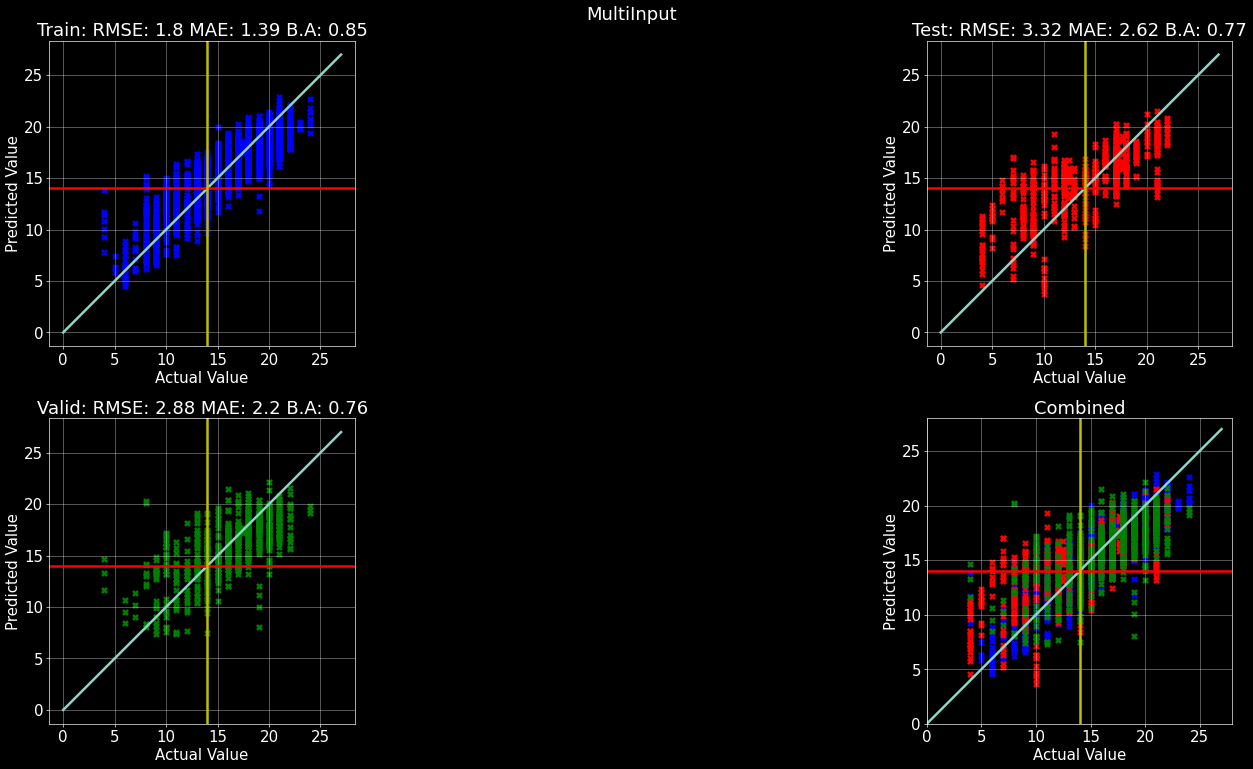

In [ ]:
plot_confusion_matrix_regression_all(
      combined_train_labels,
      combined_train_predictions ,
      combined_test_labels,
      combined_test_predictions,
      combined_valid_labels ,
      combined_valid_predictions,
      healthy_threshold,
      "MultiInput",
  )

In [ ]:
def get_confusion_matrix(preds, targets, plot_type):
  # Round predictions to the nearest integer as they are continuous values
  rounded_preds = np.round(preds)
  rounded_targets = np.round(targets)

  # Create the confusion matrix
  cm = confusion_matrix(rounded_targets, rounded_preds)

  # Plot the confusion matrix
  plt.figure(figsize=(20, 16))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(targets), yticklabels=np.unique(targets))
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(f'{plot_type} Confusion Matrix')
  plt.show()
  plt.savefig(f"{folder_path}/{plot_type} confusion matrix.png")


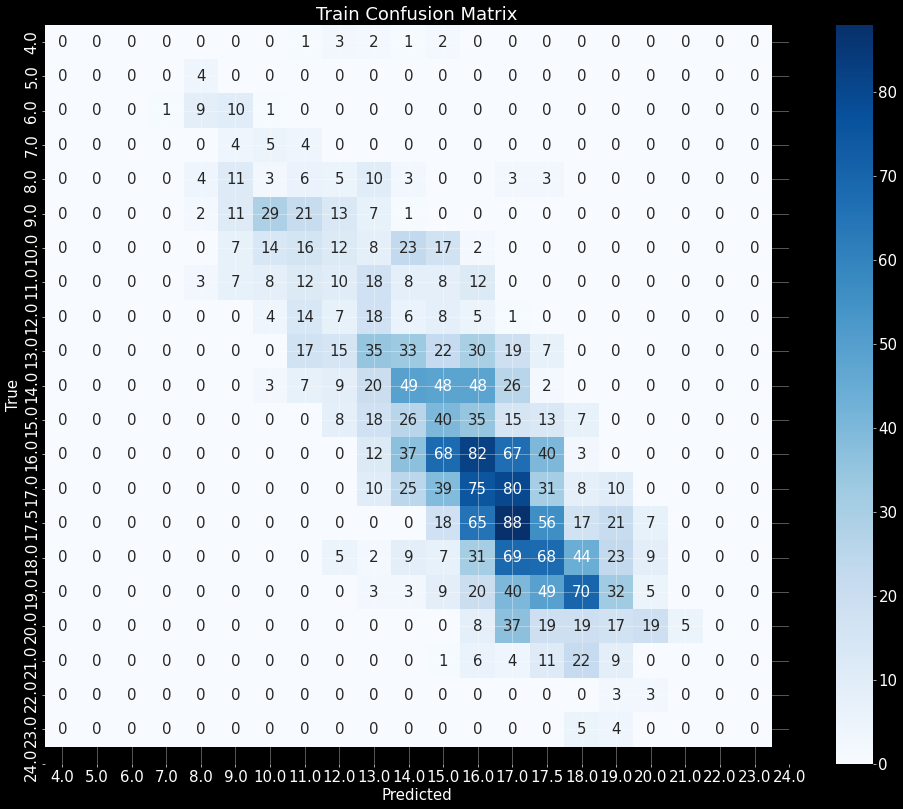

<Figure size 1800x800 with 0 Axes>

In [ ]:
#For train
get_confusion_matrix(combined_train_predictions, combined_train_labels, "Train")

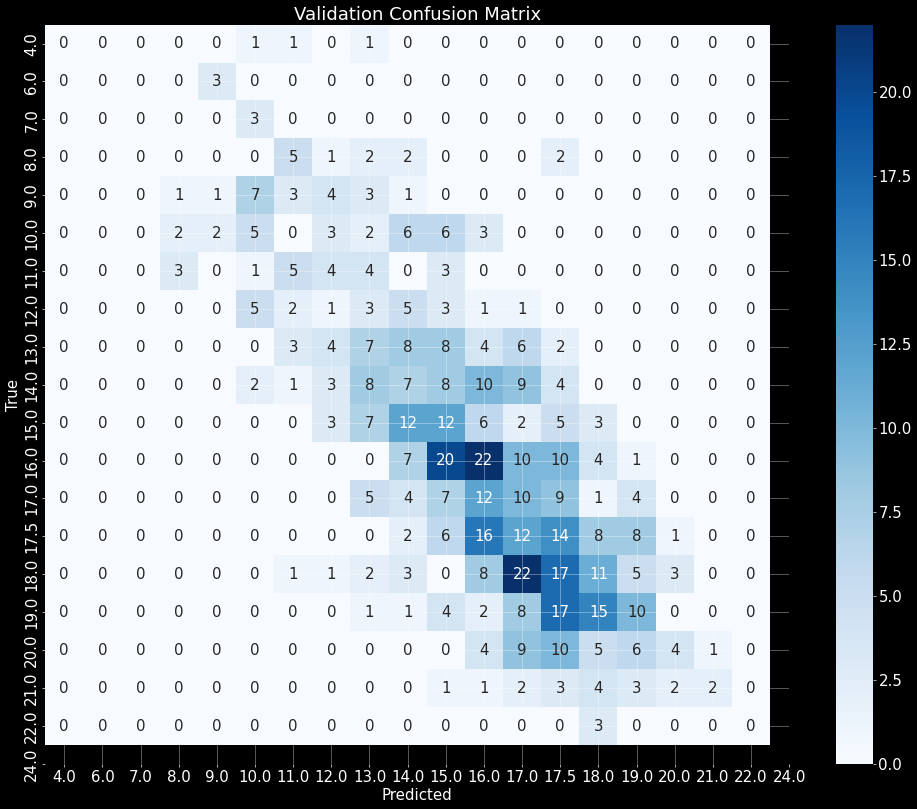

<Figure size 1800x800 with 0 Axes>

In [ ]:
#For valid
get_confusion_matrix(combined_valid_predictions, combined_valid_labels, "Validation")

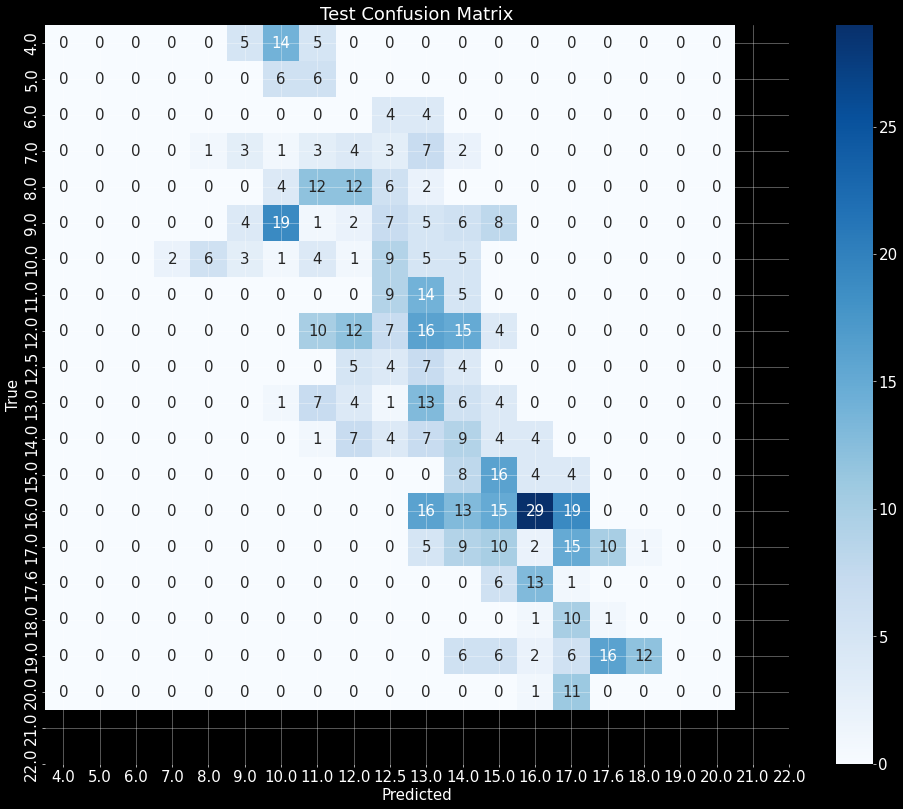

<Figure size 1800x800 with 0 Axes>

In [ ]:
#For test
get_confusion_matrix(combined_test_predictions, combined_test_labels, "Test")

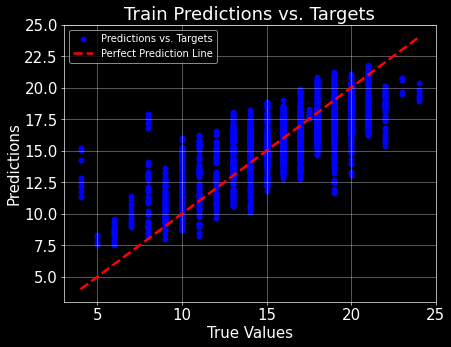

In [ ]:
import matplotlib.pyplot as plt

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(combined_train_labels, combined_train_predictions, color='blue', label='Predictions vs. Targets')
plt.plot([min(combined_train_labels), max(combined_train_labels)], [min(combined_train_labels), max(combined_train_labels)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Train Predictions vs. Targets')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.grid(True)
plt.show()
